Tutorial From Here
https://builtin.com/data-science/time-series-forecasting-python 

In [3]:
import pandas_datareader.data as web
import datetime

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import datetime

import pandas_datareader as web 

In [4]:
btc = web.get_data_yahoo(['BTC-USD'], start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2020, 12, 2))['Close']

print(btc.columns)
print(btc.index)
print(btc.head())

Index(['BTC-USD'], dtype='object', name='Symbols')
DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03'],
              dtype='datetime64[ns]', name='Date', length=1068, freq=None)
Symbols          BTC-USD
Date                    
2018-01-01  13657.200195
2018-01-02  14982.099609
2018-01-03  15201.000000
2018-01-04  15599.200195
2018-01-05  17429.500000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

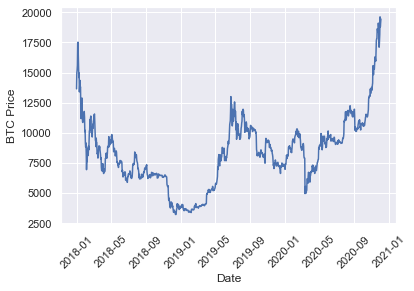

In [6]:
sns.set()

plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.plot(btc.index, btc['BTC-USD'], )

In [7]:
train = btc[btc.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = btc[btc.index > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

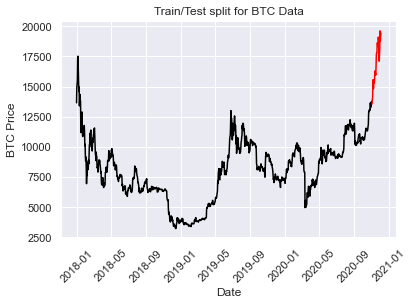

In [8]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [25]:
y = train['BTC-USD']
y

Date
2018-01-01    13657.200195
2018-01-02    14982.099609
2018-01-03    15201.000000
2018-01-04    15599.200195
2018-01-05    17429.500000
2018-01-06    17527.000000
2018-01-07    16477.599609
2018-01-08    15170.099609
2018-01-09    14595.400391
2018-01-10    14973.299805
2018-01-11    13405.799805
2018-01-12    13980.599609
2018-01-13    14360.200195
2018-01-14    13772.000000
2018-01-15    13819.799805
2018-01-16    11490.500000
2018-01-17    11188.599609
2018-01-18    11474.900391
2018-01-19    11607.400391
2018-01-20    12899.200195
2018-01-21    11600.099609
2018-01-22    10931.400391
2018-01-23    10868.400391
2018-01-24    11359.400391
2018-01-25    11259.400391
2018-01-26    11171.400391
2018-01-27    11440.700195
2018-01-28    11786.299805
2018-01-29    11296.400391
2018-01-30    10106.299805
2018-01-31    10221.099609
2018-02-01     9170.540039
2018-02-02     8830.750000
2018-02-03     9174.910156
2018-02-04     8277.009766
2018-02-05     6955.270020
2018-02-06     7754.000

In [11]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

C:\Users\dylan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dylan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [12]:
arma_y_pred = ARMAmodel.get_forecast(len(test.index))
arma_y_pred_df = arma_y_pred.conf_int(alpha = 0.05) 
arma_y_pred_df["Predictions"] = ARMAmodel.predict(start = arma_y_pred_df.index[0], end = arma_y_pred_df.index[-1])
arma_y_pred_df.index = test.index
arma_y_pred_out = arma_y_pred_df["Predictions"] 

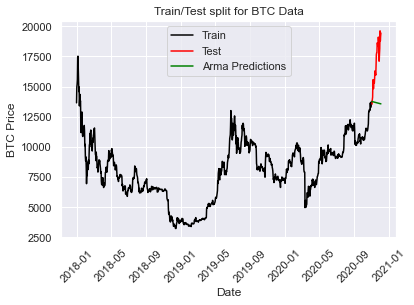

In [13]:
plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")

plt.plot(arma_y_pred_out, color='green', label = 'Arma Predictions')
plt.legend()

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, arma_y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  3736.388919168404


In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [16]:
ARIMAmodel = ARIMA(y, order = (5, 4, 2))
ARIMAmodel = ARIMAmodel.fit()

C:\Users\dylan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dylan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dylan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dylan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [17]:
arima_y_pred = ARIMAmodel.get_forecast(len(test.index))
arima_y_pred_df = arima_y_pred.conf_int(alpha = 0.05) 
arima_y_pred_df["Predictions"] = ARIMAmodel.predict(start = arima_y_pred_df.index[0], end = arima_y_pred_df.index[-1])
arima_y_pred_df.index = test.index
arima_y_pred_out = arima_y_pred_df["Predictions"] 

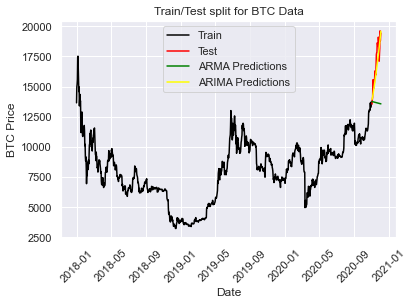

In [18]:
plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.plot(arma_y_pred_out, color='green', label = 'ARMA Predictions')
plt.plot(arima_y_pred_out, color='Yellow', label = 'ARIMA Predictions')


plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")

plt.legend()

In [19]:
btc_exog = web.get_data_yahoo(['BTC-USD'], start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2020, 12, 2))[['High', 'Volume']]

exog_train = btc_exog[btc_exog.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
exog_forecast = btc_exog[btc_exog.index > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, arima_y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  877.8378450085285


In [21]:
SARIMAXmodel = SARIMAX(y, exog_train, order = (2, 0, 2))#, seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

C:\Users\dylan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dylan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dylan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dylan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
sarima_y_pred = SARIMAXmodel.get_forecast(len(test.index), exog=exog_forecast)
sarima_y_pred_df = sarima_y_pred.conf_int(alpha = 0.05) 
sarima_y_pred_df["Predictions"] = SARIMAXmodel.predict(start = sarima_y_pred_df.index[0], end = sarima_y_pred_df.index[-1], exog=exog_forecast)
sarima_y_pred_df.index = test.index
sarima_y_pred_out = sarima_y_pred_df["Predictions"] 
sarima_y_pred_out

            lower BTC-USD  upper BTC-USD
2020-11-01   10609.672693   11511.074065
2020-11-02   12349.770569   13422.056253
2020-11-03   13346.076435   14454.119265
2020-11-04   14800.576965   15908.619795
2020-11-05   14993.046007   16101.088837
2020-11-06   14829.998540   15938.041370
2020-11-07   14731.656702   15839.699532
2020-11-08   14876.864890   15984.907720
2020-11-09   14548.797657   15656.840487
2020-11-10   15004.587077   16112.629907
2020-11-11   15384.957028   16492.999857
2020-11-12   15539.293586   16647.336415
2020-11-13   15396.812118   16504.854948
2020-11-14   15206.147673   16314.190503
2020-11-15   15884.292967   16992.335796
2020-11-16   16829.866581   17937.909411
2020-11-17   17428.043831   18536.086660
2020-11-18   17158.668007   18266.710837
2020-11-19   17797.539246   18905.582076
2020-11-20   17957.493852   19065.536681
2020-11-21   17715.612723   18823.655553
2020-11-22   17737.704894   18845.747724
2020-11-23   18360.982691   19469.025521
2020-11-24   184

Date
2020-11-02    11060.373379
2020-11-03    12885.913411
2020-11-04    13900.097850
2020-11-05    15354.598380
2020-11-06    15547.067422
2020-11-07    15384.019955
2020-11-08    15285.678117
2020-11-09    15430.886305
2020-11-10    15102.819072
2020-11-11    15558.608492
2020-11-12    15938.978442
2020-11-13    16093.315001
2020-11-14    15950.833533
2020-11-15    15760.169088
2020-11-16    16438.314381
2020-11-17    17383.887996
2020-11-18    17982.065245
2020-11-19    17712.689422
2020-11-20    18351.560661
2020-11-21    18511.515267
2020-11-22    18269.634138
2020-11-23    18291.726309
2020-11-24    18915.004106
2020-11-25    18955.965795
2020-11-26    18444.915301
2020-11-27    17053.634754
2020-11-28    17452.667462
2020-11-29    17872.477693
2020-11-30    19306.543175
2020-12-01    19401.250811
2020-12-02    18874.580219
2020-12-03    19126.061990
Name: Predictions, dtype: float64

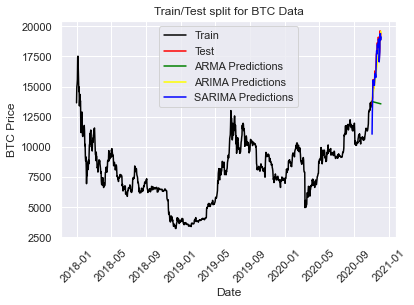

In [23]:
plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.plot(arma_y_pred_out, color='green', label = 'ARMA Predictions')
plt.plot(arima_y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.plot(sarima_y_pred_out, color='Blue', label = 'SARIMA Predictions')

plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")

plt.legend()

In [24]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, sarima_y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  585.0082583748731
